In [227]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from parse_log import parse_log

In [228]:
_, market_data, trade_history = parse_log("logs/empty_submission.log")

In [229]:
kelp_data = market_data[market_data["product"] == "KELP"]

In [230]:
kelp_data['timestamp'].value_counts().value_counts()

count
1    2000
Name: count, dtype: int64

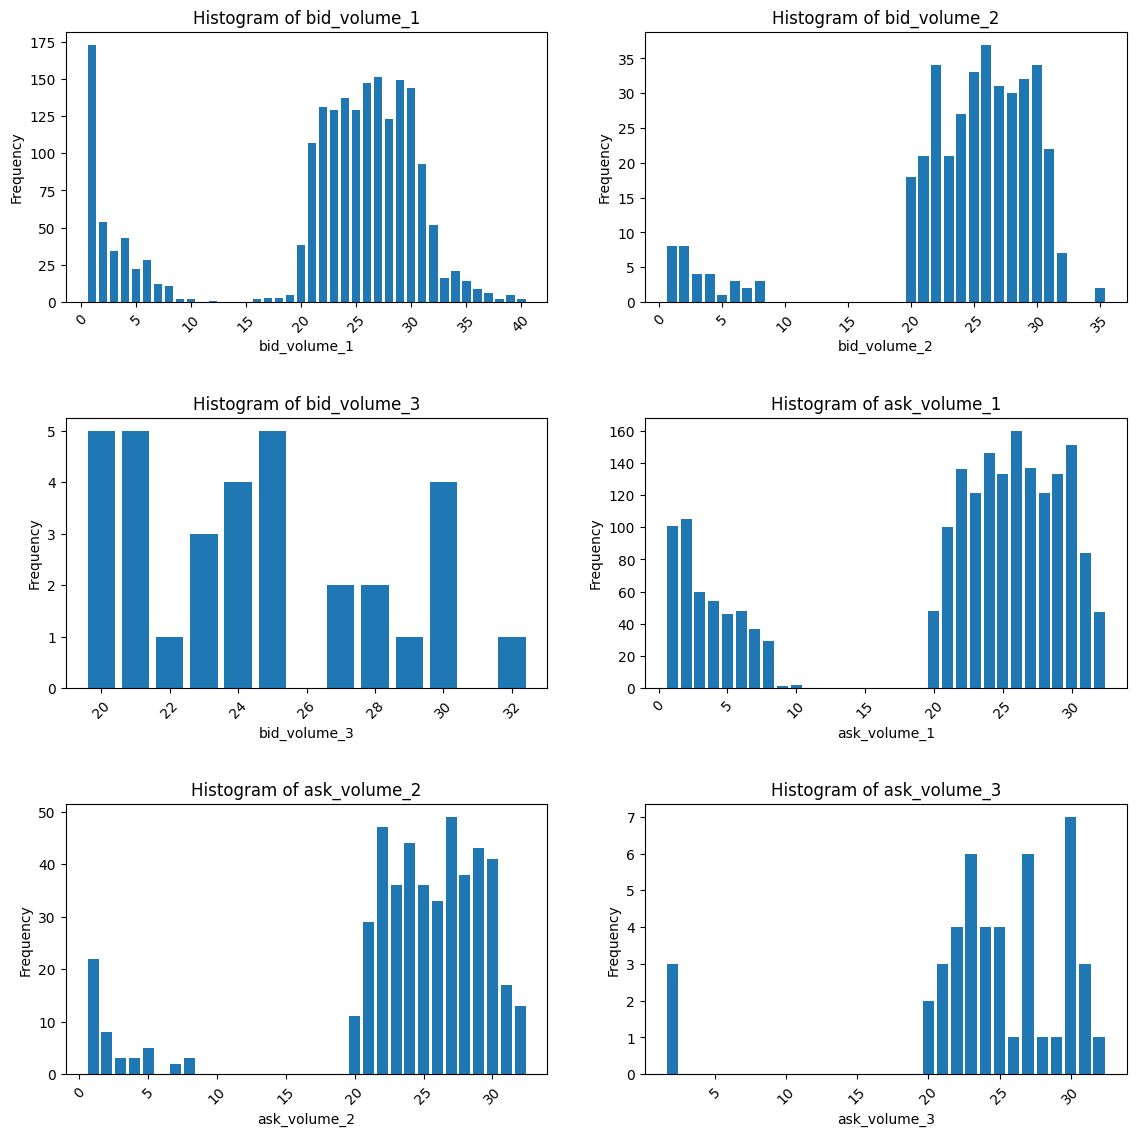

In [231]:
cols_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(cols_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(cols_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = kelp_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [232]:
((kelp_data['bid_volume_1'] >= 11) & (kelp_data['bid_volume_1'] <= 20)).sum()

np.int64(52)

In [233]:
kelp_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0


In [234]:
kelp_data.iloc[0]['bid_volume_1']

np.int64(1)

In [235]:
def calc_mm_mid(row, mm_threshold):
    bids = []
    asks = []
    for i in range(1, 4):
        bid_vol = row[f'bid_volume_{i}']
        bid_price = row[f'bid_price_{i}']
        if bid_vol >= mm_threshold:
            bids.append((bid_price, bid_vol))

        ask_vol = row[f'ask_volume_{i}']
        ask_price = row[f'ask_price_{i}']
        if ask_vol >= mm_threshold:
            asks.append((ask_price, ask_vol))
    
    best_bid, best_bid_vol = max(bids) if bids else (None, None)
    best_ask, best_ask_vol = min(asks) if asks else (None, None)

    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None



for i in range(11, 21):
    kelp_data[f'mm_price_{i}'] = kelp_data.apply(lambda row: calc_mm_mid(row, i), axis=1)
    kelp_data[f'p_diff_{i}'] = kelp_data[f'mm_price_{i}'] - kelp_data['mid_price']

/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_40967/1696829822.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_40967/1696829822.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_40967/1696829822.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [236]:
px.line(kelp_data, 'timestamp', 'mm_price_16', title='Kelp MM Price')

In [237]:
px.line(kelp_data, 'timestamp', 'mid_price', title='Indicated mid_price')

In [238]:
for col in [f'p_diff_{i}' for i in range(11, 21)]:
    print(kelp_data[col].value_counts())


p_diff_11
 0.0    1218
 0.5     260
-0.5     172
 1.0     135
-1.0     131
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_12
 0.0    1218
 0.5     260
-0.5     172
 1.0     135
-1.0     131
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_13
 0.0    1217
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_14
 0.0    1217
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_15
 0.0    1217
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_16
 0.0    1217
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_17
 0.0    1215
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: count, dtype: int64
p_diff_18
 0.0    1212
 0.5     260
-0.5     172
 1.0     135
-1.0     132
 1.5      45
-1.5      36
Name: coun

In [239]:
px.line(kelp_data, 'timestamp', 'p_diff_14')

In [240]:
return_windows = [1, 2, 5, 10, 15, 20, 30, 50, 100]
kelp_returns = pd.DataFrame()

for i in return_windows:
    kelp_returns[f'return_past_{i}_its'] = kelp_data['mm_price_15'] / kelp_data['mm_price_15'].shift(i)
    kelp_returns[f'return_future_{i}_its'] = kelp_data['mm_price_15'].shift(-i) / kelp_data['mm_price_15']

for i in return_windows:
    kelp_returns[f'past_pct_change_{i}'] = kelp_returns[f'return_past_{i}_its'] - 1
    kelp_returns[f'future_pct_change_{i}'] = kelp_returns[f'return_future_{i}_its'] - 1

for i in return_windows:
    kelp_returns[f'log_returns_past_{i}'] = np.log(kelp_returns[f'return_past_{i}_its'])
    kelp_returns[f'log_returns_future_{i}'] = np.log(kelp_returns[f'return_future_{i}_its'])

In [241]:
kelp_returns

,return_past_1_its,return_future_1_its,return_past_2_its,return_future_2_its,return_past_5_its,return_future_5_its,return_past_10_its,return_future_10_its,return_past_15_its,return_future_15_its,...,log_returns_past_15,log_returns_future_15,log_returns_past_20,log_returns_future_20,log_returns_past_30,log_returns_future_30,log_returns_past_50,log_returns_future_50,log_returns_past_100,log_returns_future_100
1,NaN,1.000000,NaN,0.999753,NaN,0.999753,NaN,0.999260,NaN,0.999507,...,NaN,-0.000493,NaN,-0.000740,NaN,-0.000740,NaN,-0.001234,NaN,-0.001234
2,1.000000,0.999753,NaN,1.000000,NaN,0.999753,NaN,0.999507,NaN,0.999507,...,NaN,-0.000493,NaN,-0.000493,NaN,-0.001234,NaN,-0.001234,NaN,-0.001234
5,0.999753,1.000247,0.999753,1.000000,NaN,0.999753,NaN,0.999753,NaN,0.999753,...,NaN,-0.000247,NaN,-0.000247,NaN,-0.000987,NaN,-0.000987,NaN,-0.001234
6,1.000247,0.999753,1.000000,0.999753,NaN,0.999013,NaN,0.999507,NaN,0.999507,...,NaN,-0.000493,NaN,-0.000493,NaN,-0.001234,NaN,-0.001234,NaN,-0.001728
9,0.999753,1.000000,1.000000,1.000000,NaN,0.999507,NaN,0.999753,NaN,0.999507,...,NaN,-0.000494,NaN,-0.000247,NaN,-0.000987,NaN,-0.000740,NaN,-0.001234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,1.000000,1.000000,1.000000,1.000000,1.000247,NaN,0.999753,NaN,0.999753,NaN,...,-0.000247,NaN,0.000247,NaN,0.000495,NaN,0.001237,NaN,0.000000,NaN
3992,1.000000,1.000000,1.000000,0.999753,1.000247,NaN,0.999753,NaN,0.999753,NaN,...,-0.000247,NaN,0.000000,NaN,0.000247,NaN,0.001237,NaN,0.000247,NaN
3995,1.000000,0.999753,1.000000,1.000000,1.000247,NaN,1.000247,NaN,0.999753,NaN,...,-0.000247,NaN,-0.000247,NaN,0.000247,NaN,0.001237,NaN,0.000247,NaN
3997,0.999753,1.000247,0.999753,NaN,0.999753,NaN,0.999506,NaN,0.999506,NaN,...,-0.000495,NaN,-0.000495,NaN,-0.000247,NaN,0.000990,NaN,0.000000,NaN


In [242]:
px.line(x=kelp_data['timestamp'], y=kelp_returns['past_pct_change_10'])

In [243]:
px.line(x=kelp_data['timestamp'], y=kelp_returns['log_returns_past_1'])

In [244]:
kelp_returns['log_returns_past_1'].describe()

count    1993.000000
mean       -0.000001
std         0.000159
min        -0.000745
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000744
Name: log_returns_past_1, dtype: float64

In [256]:
past_pct_cols = [f'past_pct_change_{i}' for i in return_windows]

# annualized = 2000/i for i in return_windows

for i in return_windows:
    normalized_return = ((1 + kelp_returns[f'past_pct_change_{i}']).prod()) ** (i/2000)
    print(f'past_pct_change_{i}:', normalized_return)

past_pct_change_1: 0.9999986411656671
past_pct_change_2: 0.999995061316129
past_pct_change_5: 0.9999709831224834
past_pct_change_10: 0.9998826463605901
past_pct_change_15: 0.9997591525905147
past_pct_change_20: 0.9996048478316805
past_pct_change_30: 0.9991481688842604
past_pct_change_50: 0.9975010289635526
past_pct_change_100: 0.9897961399256543


In [251]:
for i in return_windows:
    normalized_return = (1 + kelp_returns[f'past_pct_change_{i}']) ** (2000/i) - 1
    print(f'past_pct_change_{i}:', normalized_return.mean())

past_pct_change_1: 0.04847837717353592
past_pct_change_2: 0.018198747373486066
past_pct_change_5: 0.005162000036654488
past_pct_change_10: 0.0012858104746815923
past_pct_change_15: 0.00026391823252874385
past_pct_change_20: -0.00024148369869956597
past_pct_change_30: -0.0007800253125954442
past_pct_change_50: -0.0013893487739593262
past_pct_change_100: -0.001888738740295506


In [264]:
for i in return_windows:
    normalized_return = kelp_returns[f'log_returns_past_{i}'] * (2000/i)
    print(f'log_returns_past_{i}:', normalized_return.mean())

log_returns_past_1: -0.0027272157675668194
log_returns_past_2: -0.0024792650935394718
log_returns_past_5: -0.0023342221027058585
log_returns_past_10: -0.002366139634817832
log_returns_past_15: -0.0021638440773042934
log_returns_past_20: -0.0020021796429113793
log_returns_past_30: -0.0019284773252554299
log_returns_past_50: -0.0020593404742731618
log_returns_past_100: -0.002166056245997993


In [265]:
for i in return_windows:
    normalized_returns = kelp_returns[f'return_past_{i}_its'].prod() ** (i/2000)
    print(f'normalized factor_returns_{i}:', normalized_return)

normalized factor_returns_1: 1            NaN
2            NaN
5            NaN
6            NaN
9            NaN
          ...   
3990    0.000000
3992    0.004946
3995    0.004946
3997    0.000000
3998    0.004946
Name: log_returns_past_100, Length: 2000, dtype: float64
normalized factor_returns_2: 1            NaN
2            NaN
5            NaN
6            NaN
9            NaN
          ...   
3990    0.000000
3992    0.004946
3995    0.004946
3997    0.000000
3998    0.004946
Name: log_returns_past_100, Length: 2000, dtype: float64
normalized factor_returns_5: 1            NaN
2            NaN
5            NaN
6            NaN
9            NaN
          ...   
3990    0.000000
3992    0.004946
3995    0.004946
3997    0.000000
3998    0.004946
Name: log_returns_past_100, Length: 2000, dtype: float64
normalized factor_returns_10: 1            NaN
2            NaN
5            NaN
6            NaN
9            NaN
          ...   
3990    0.000000
3992    0.004946
3995    0.00494

In [261]:
for i in return_windows:
    normalized_return = kelp_returns[f'log_returns_past_{i}'] * (2000/i)
    print(f'log_returns_past_{i}:', np.exp(normalized_return.mean()))

log_returns_past_1: 0.9972764997069535
log_returns_past_2: 0.99752380574583
log_returns_past_5: 0.9976685000752387
log_returns_past_10: 0.9976366574670218
log_returns_past_15: 0.9978384953456048
log_returns_past_20: 0.9979998233817218
log_returns_past_30: 0.9980733809923752
log_returns_past_50: 0.9979427785125
log_returns_past_100: 0.9978362879609656


<Axes: >

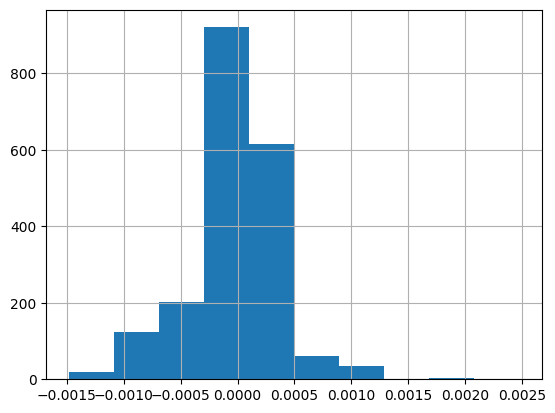

In [147]:
kelp_returns['past_pct_change_10'].hist()

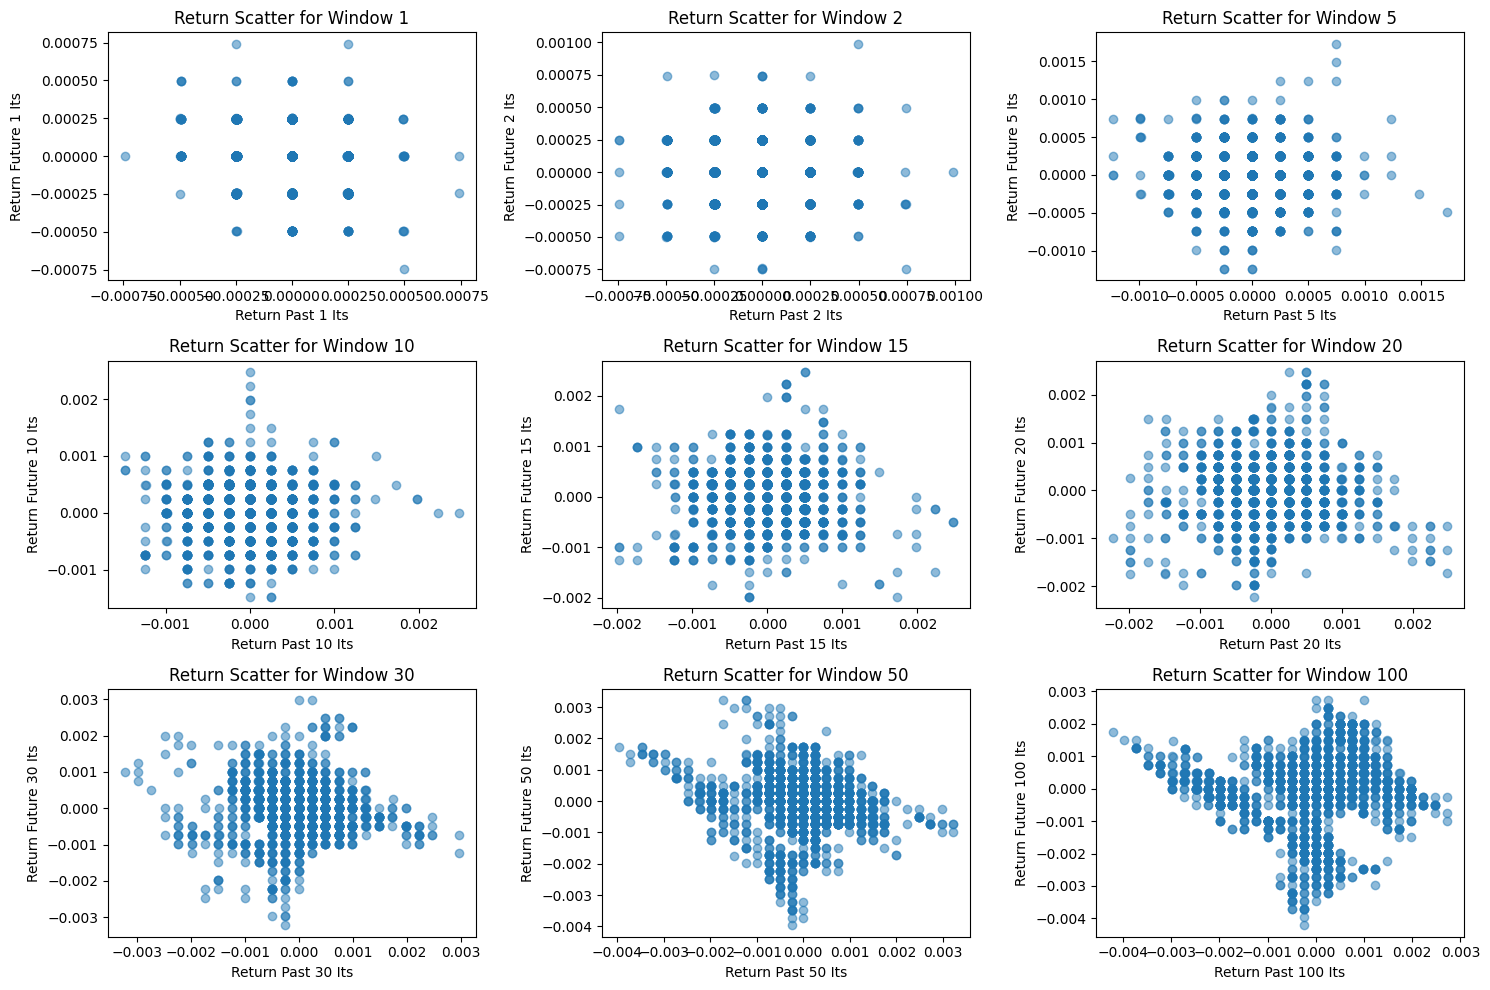

In [263]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.scatter(kelp_returns[f'log_returns_past_{i}'], kelp_returns[f'log_returns_future_{i}'], alpha=0.5)
    plt.xlabel(f'Return Past {i} Its')
    plt.ylabel(f'Return Future {i} Its')
    plt.title(f'Return Scatter for Window {i}')
    plt.tight_layout()

plt.show()

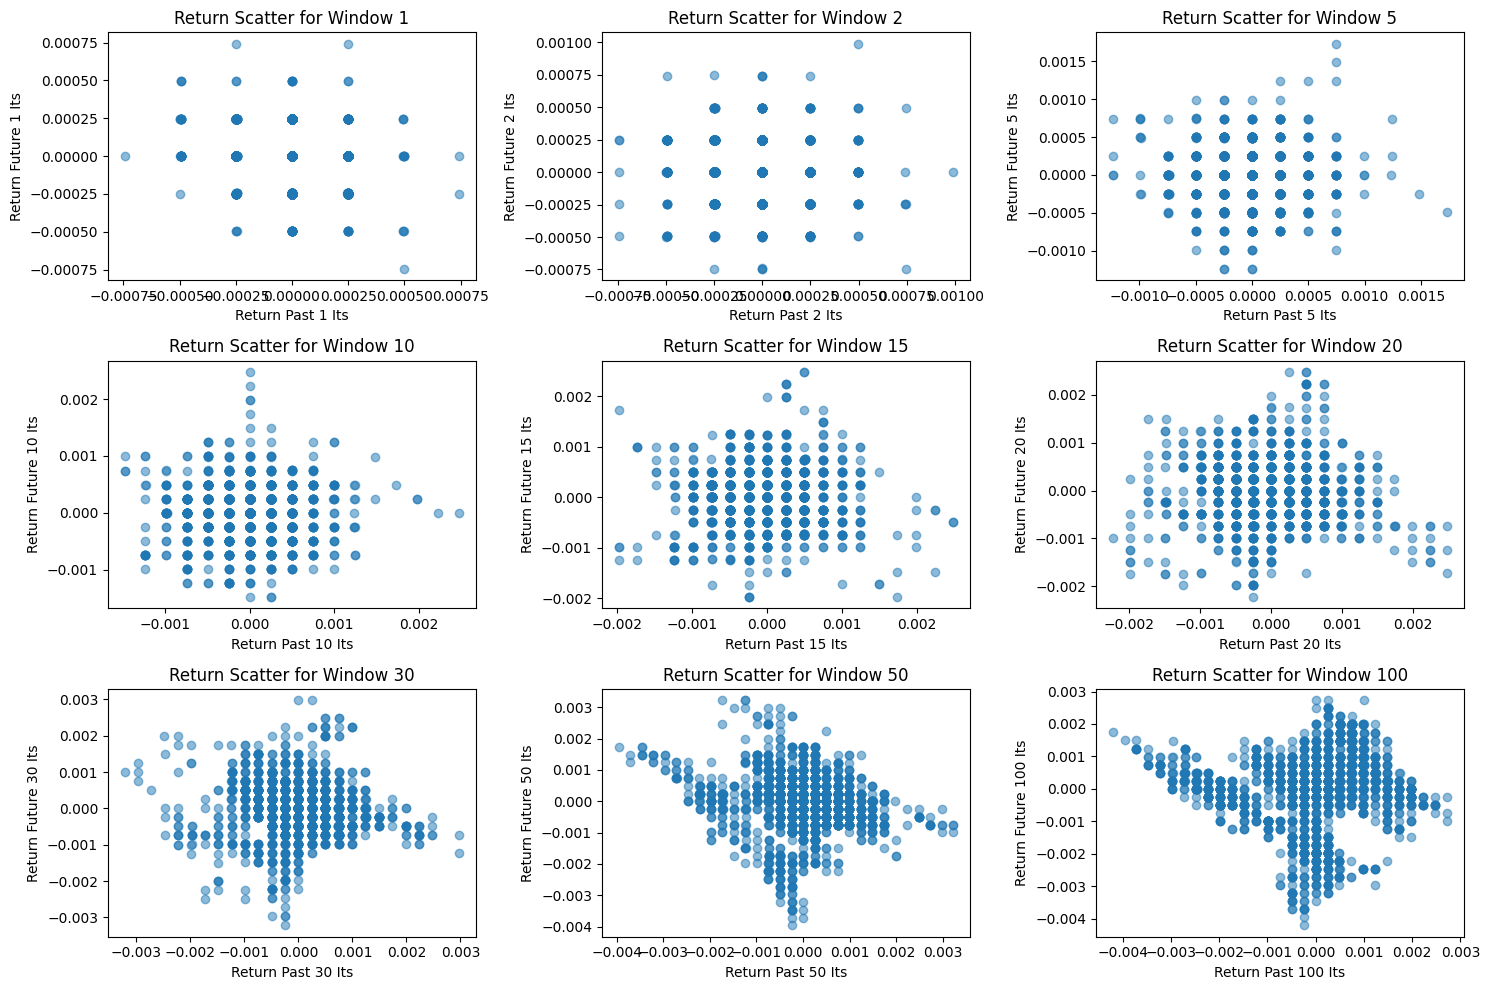

In [162]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.scatter(kelp_returns[f'past_pct_change_{i}'], kelp_returns[f'future_pct_change_{i}'], alpha=0.5)
    plt.xlabel(f'Return Past {i} Its')
    plt.ylabel(f'Return Future {i} Its')
    plt.title(f'Return Scatter for Window {i}')
    plt.tight_layout()

plt.show()

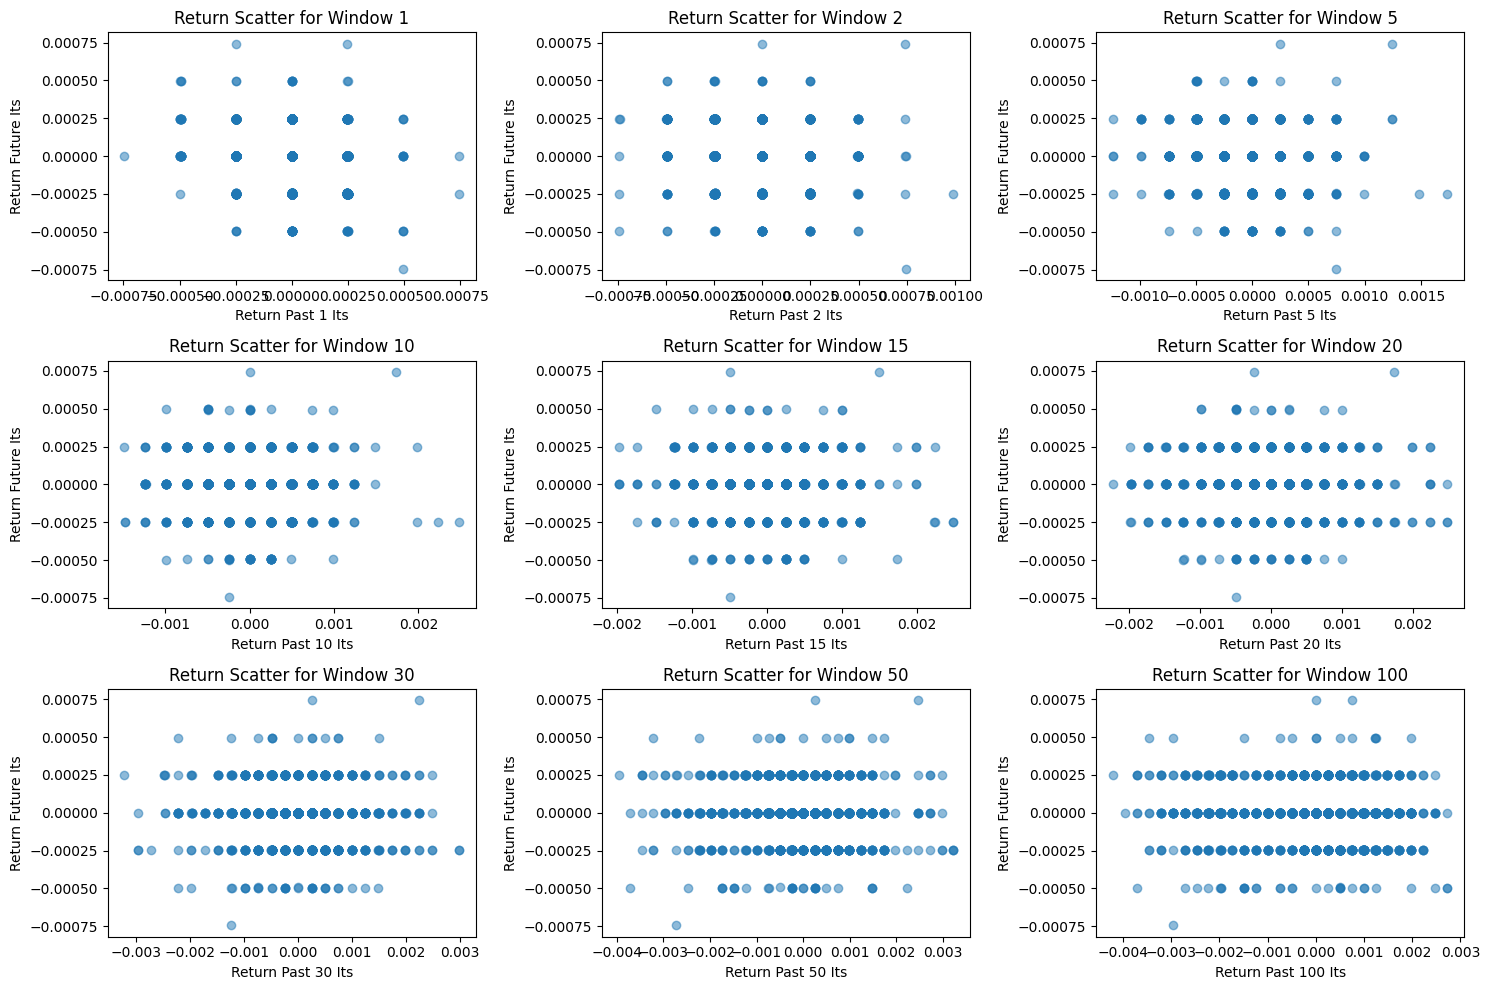

In [163]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.scatter(kelp_returns[f'past_pct_change_{i}'], kelp_returns[f'future_pct_change_1'], alpha=0.5)
    plt.xlabel(f'Return Past {i} Its')
    plt.ylabel('Return Future Its')
    plt.title(f'Return Scatter for Window {i}')
    plt.tight_layout()

plt.show()

In [130]:
past_pct_cols = [f'past_pct_change_{i}' for i in return_windows]

# annualized = 2000/i for i in return_windows

for i in return_windows:
    normalized_return = (1 + kelp_returns[f'past_pct_change_{i}'].mean()) ** (2000/i) - 1
    print(f'past_pct_change_{i}:', normalized_return)

for i in return_windows:
    print('Window', i)
    t_test, p_value = stats.ttest_1samp(kelp_returns[f'past_pct_change_{i}'].dropna(), 0)
    # t_test, p_value = stats.ttest_1samp(kelp_returns['return_past_1_its'].dropna(), 1)
    print(f'{t_test=}')
    print(f'{p_value=}')
    print()

Window 1
t_test=np.float64(-0.38030537334469244)
p_value=np.float64(0.7037592936772381)

Window 2
t_test=np.float64(-0.5413517861671264)
p_value=np.float64(0.5883256993269006)

Window 5
t_test=np.float64(-0.8454291754716362)
p_value=np.float64(0.3979729997086562)

Window 10
t_test=np.float64(-1.227427441655838)
p_value=np.float64(0.2198076664497855)

Window 15
t_test=np.float64(-1.372794141200132)
p_value=np.float64(0.16997196961142422)

Window 20
t_test=np.float64(-1.4879185944539601)
p_value=np.float64(0.13693216333964067)

Window 30
t_test=np.float64(-1.7666899084676508)
p_value=np.float64(0.07743555408586152)

Window 50
t_test=np.float64(-2.45559687636574)
p_value=np.float64(0.0141521034863117)

Window 100
t_test=np.float64(-3.981052488207441)
p_value=np.float64(7.120197846477495e-05)



It seems the larger the window the more significantly we find that the mean returns are actually NOT 0

Now, question is whether we should use 0 as the mean for regression or should we use estimated mean?

t_test=np.float64(-0.38030537334469244)
p_value=np.float64(0.7037592936772381)


In [98]:
kelp_abs_changes = pd.DataFrame()

for i in return_windows:
    kelp_abs_changes[f'past_delta_{i}'] = kelp_data['mm_price'] - kelp_data['mm_price'].shift(i)
    kelp_abs_changes[f'future_delta_{i}'] = kelp_data['mm_price'].shift(-i) - kelp_data['mm_price']

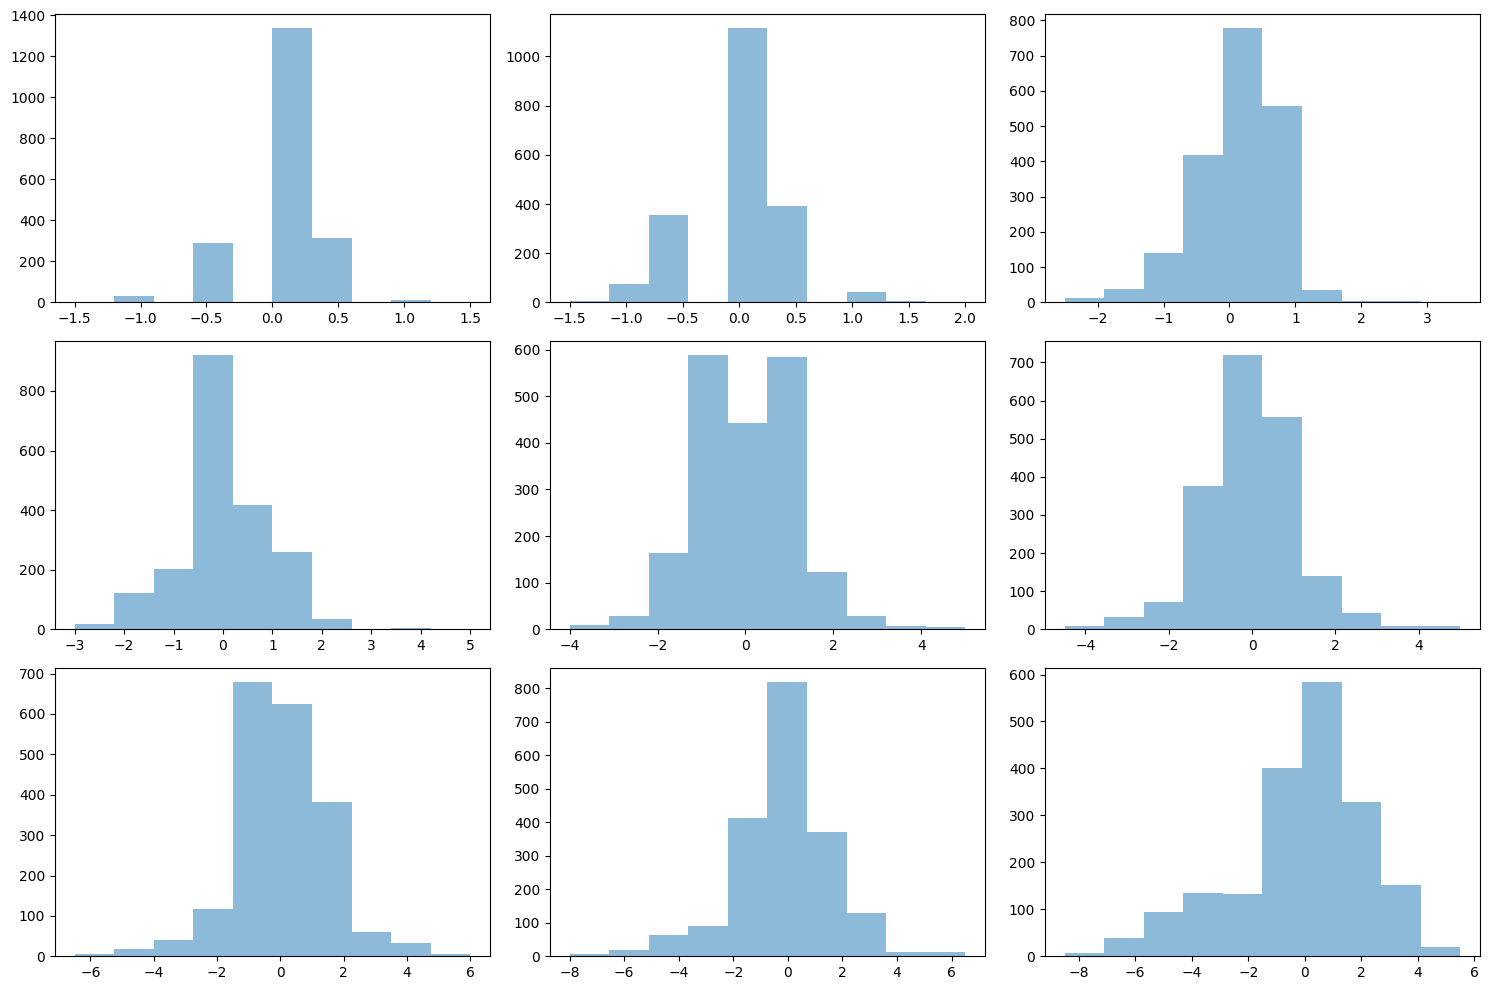

In [102]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.hist(kelp_abs_changes[f'past_delta_{i}'], alpha=0.5)
    # plt.xlabel(f'Return Past {i} Its')
    # plt.ylabel(f'Return Future {i} Its')
    # plt.title(f'Return Scatter for Window {i}')
    plt.tight_layout()

plt.show()

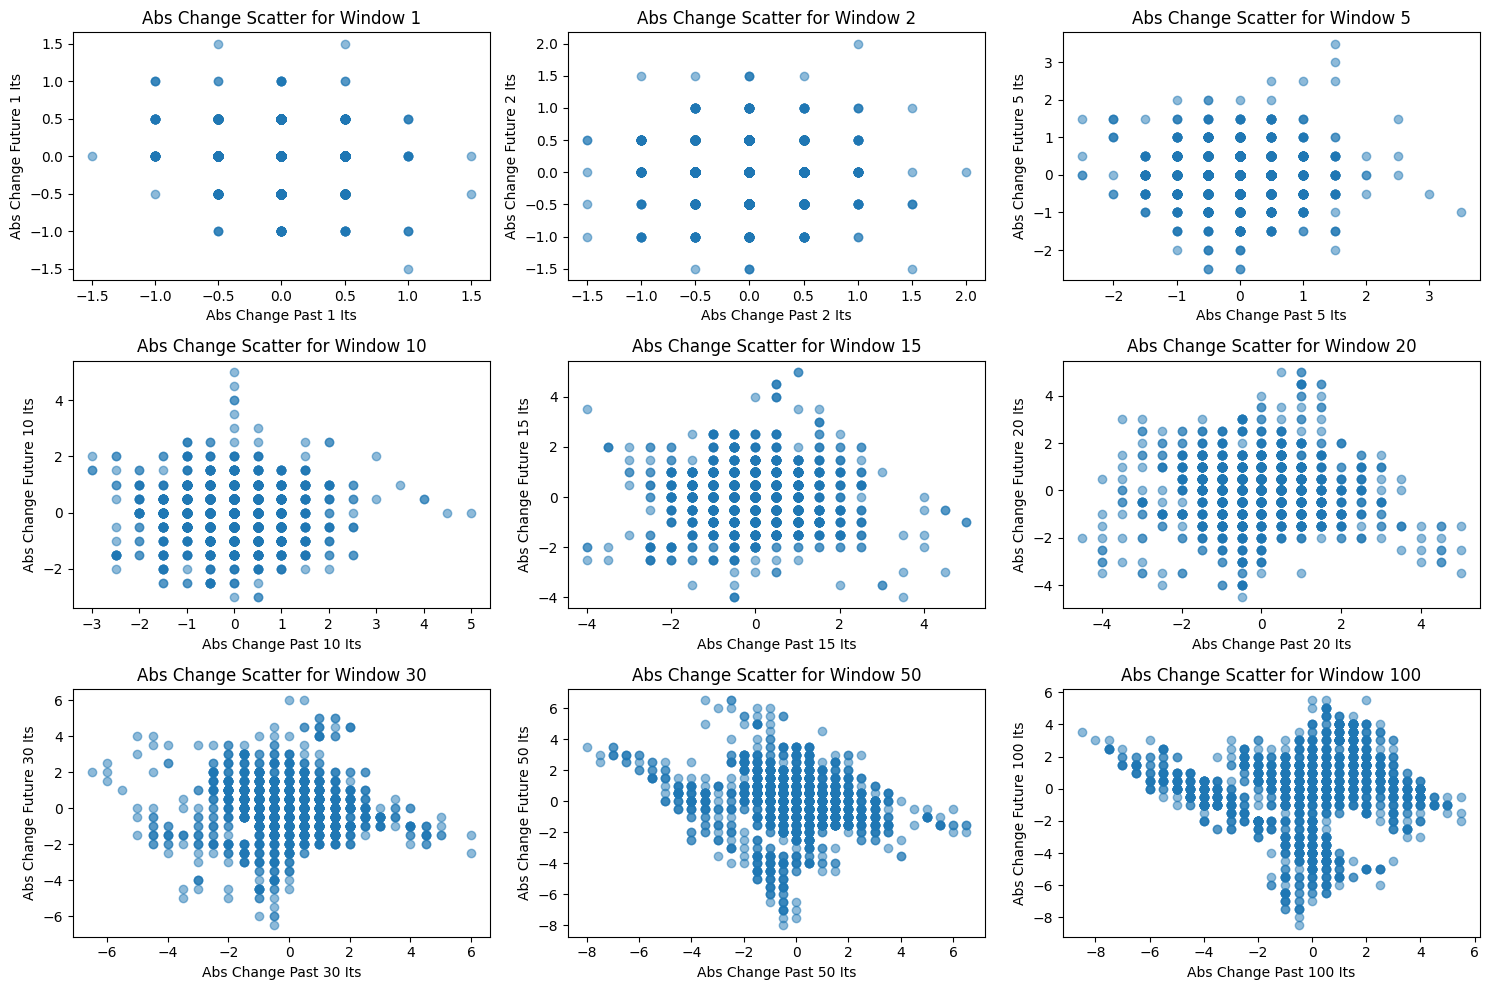

In [ ]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.scatter(kelp_abs_changes[f'past_delta_{i}'], kelp_abs_changes[f'future_delta_{i}'], alpha=0.5)
    plt.xlabel(f'Abs Change Past {i} Its')
    plt.ylabel(f'Abs Change Future {i} Its')
    plt.title(f'Abs Change Scatter for Window {i}')
    plt.tight_layout()

plt.show()

In [105]:
from sklearn.linear_model import LinearRegression

for i in return_windows:
    x = kelp_returns[f'return_past_{i}_its']
    y = kelp_returns[f'return_future_{i}_its']

ModuleNotFoundError: No module named 'scikitlearn'